In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
# from tensorflow.keras.preprocessing import image
from PIL import Image
from collections import Counter
from fractions import Fraction

## Create dataset for every classification + View images

In [2]:
# Load the arrays from files
X = np.load('trashbox_224x224.npy', allow_pickle=False)
y = np.load('labels.npy', allow_pickle=False)

In [3]:
for classification in np.unique(y):
    classification_str = classification.replace(' ', '_')
    exec(f"{classification_str} = X[y == '{classification}']") 

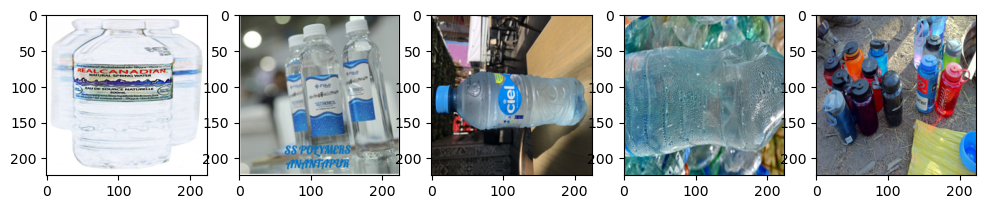

In [4]:
# Beverage Cans
_, axs = plt.subplots(1,5, figsize = (12,12))
axs = axs.flatten()
for img, ax in zip(plastic_bottles[:5], axs):
    ax.imshow(img)

## Create complete dataset

In [5]:
data = {'Image_Array': [i for i in X], 'Classification': y}
df = pd.DataFrame(data)

In [6]:
df.head()

,Image_Array,Classification
0,"[[[216, 192, 163], [224, 200, 172], [227, 203,...",paper
1,"[[[248, 252, 253], [254, 255, 253], [206, 200,...",paper
2,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",paper
3,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",paper
4,"[[[214, 220, 215], [158, 138, 139], [97, 48, 5...",paper


In [7]:
print('Number of images: ', len(df))

Number of images:  24601


## EDA

Note that the image sizes / aspect ratio section of EDA will show as all the same now that I have added code above to resize all images to the same size. To get the original distribution, we can comment out the line that resizes the images in one of the cells above.

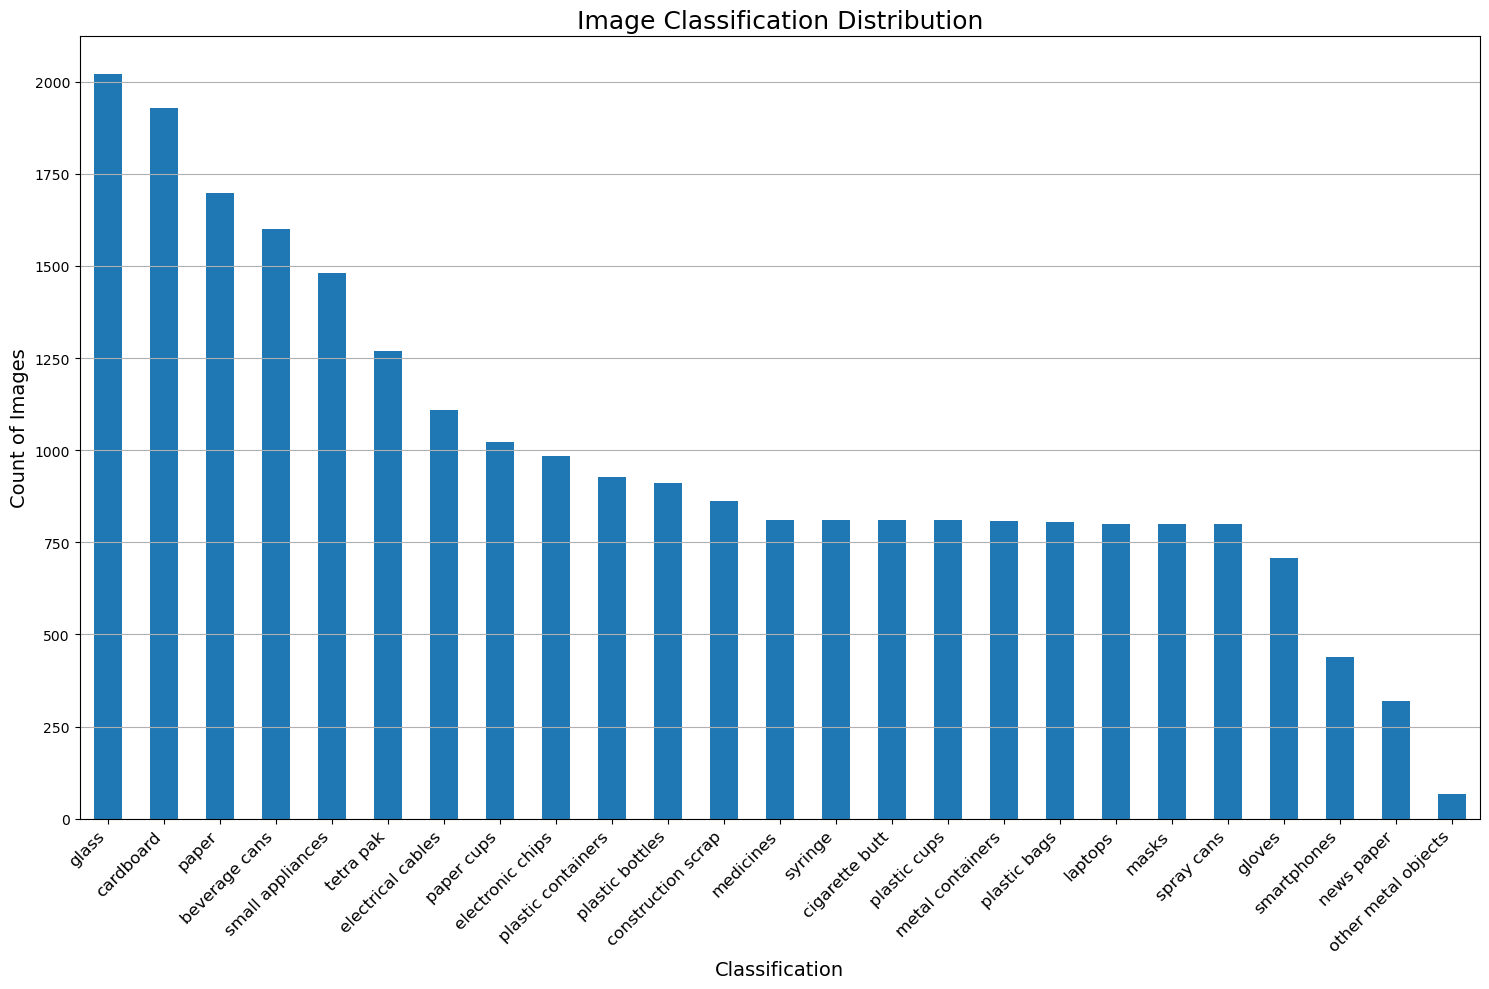

In [8]:
# Group the DataFrame by 'IClassification' and count the occurrences
classification_counts = df['Classification'].value_counts()

# Plot the bar chart
plt.figure(figsize=(15, 10))
classification_counts.plot(kind='bar')
plt.title('Image Classification Distribution', fontsize = 18)
plt.xlabel('Classification', fontsize = 14)
plt.ylabel('Count of Images', fontsize = 14)
plt.xticks(rotation=45, fontsize = 12, ha='right')
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

In [9]:
df['Image_Shape'] = [(image.shape[0], image.shape[1]) for image in df['Image_Array']]
df['Aspect_Ratio'] = df['Image_Shape'].apply(lambda x: f"{Fraction(x[0], x[1]).numerator}:{Fraction(x[0], x[1]).denominator}")
df.head()

,Image_Array,Classification,Image_Shape,Aspect_Ratio
0,"[[[216, 192, 163], [224, 200, 172], [227, 203,...",paper,"(224, 224)",1:1
1,"[[[248, 252, 253], [254, 255, 253], [206, 200,...",paper,"(224, 224)",1:1
2,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",paper,"(224, 224)",1:1
3,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",paper,"(224, 224)",1:1
4,"[[[214, 220, 215], [158, 138, 139], [97, 48, 5...",paper,"(224, 224)",1:1


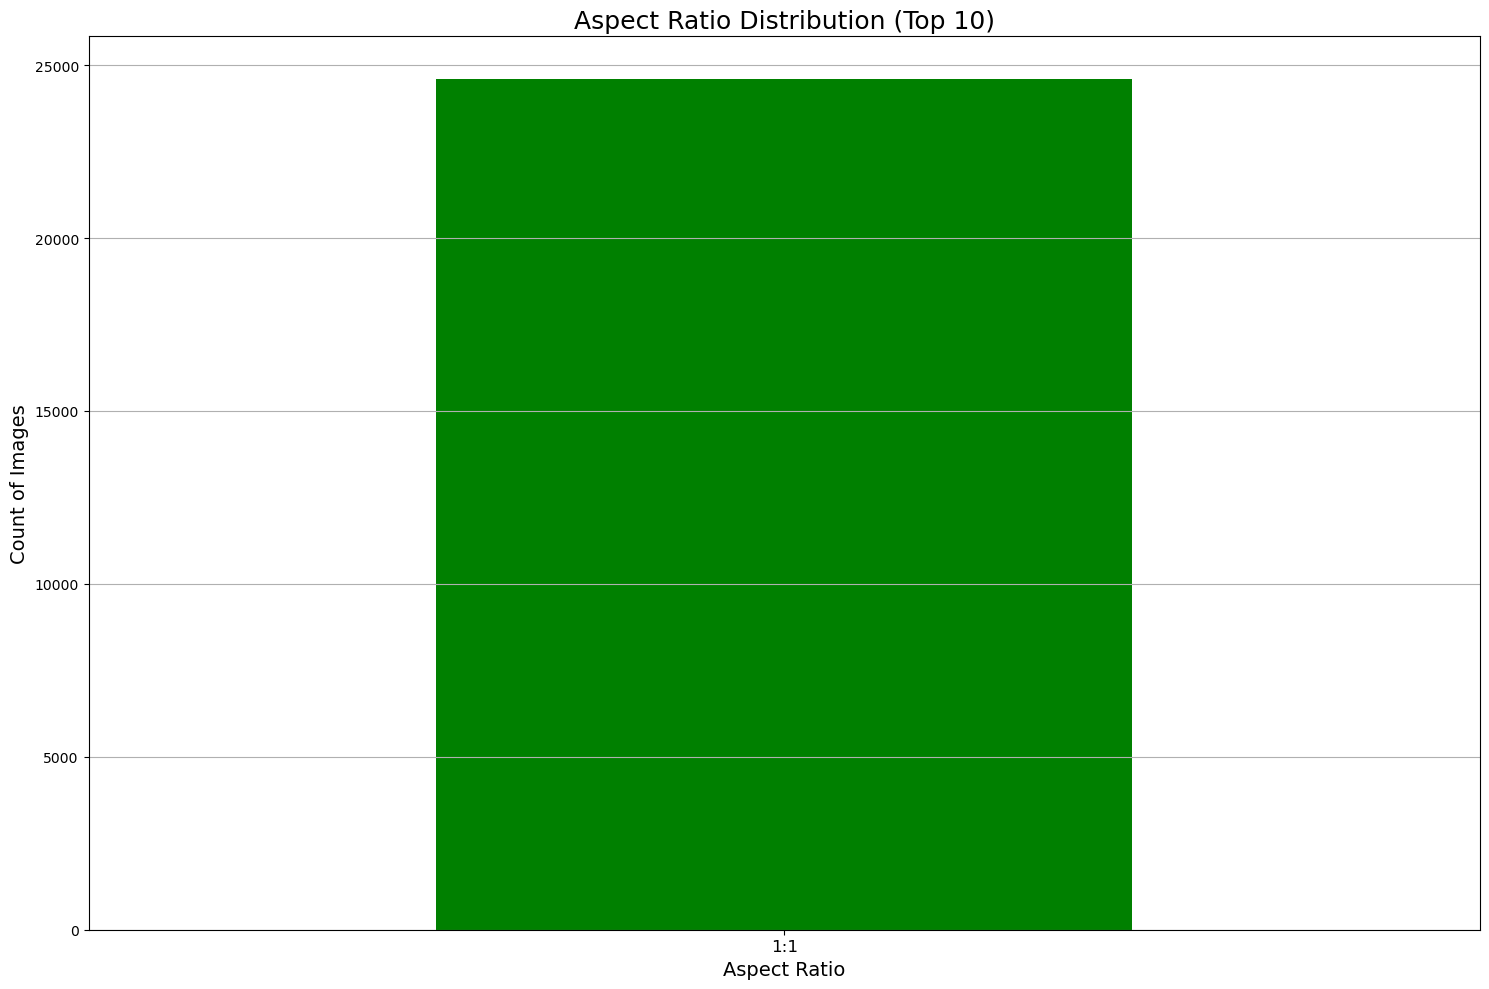

In [10]:
# Group the DataFrame by 'Aspect_Ratio' and count the occurrences
aspect_ratio_counts = df['Aspect_Ratio'].value_counts()

# Plot the bar chart
plt.figure(figsize=(15, 10))
aspect_ratio_counts[:10].plot(kind='bar', color = 'green')
plt.title('Aspect Ratio Distribution (Top 10)', fontsize = 18)
plt.xlabel('Aspect Ratio', fontsize = 14)
plt.ylabel('Count of Images', fontsize = 14)
plt.xticks(rotation=0, fontsize = 12)
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

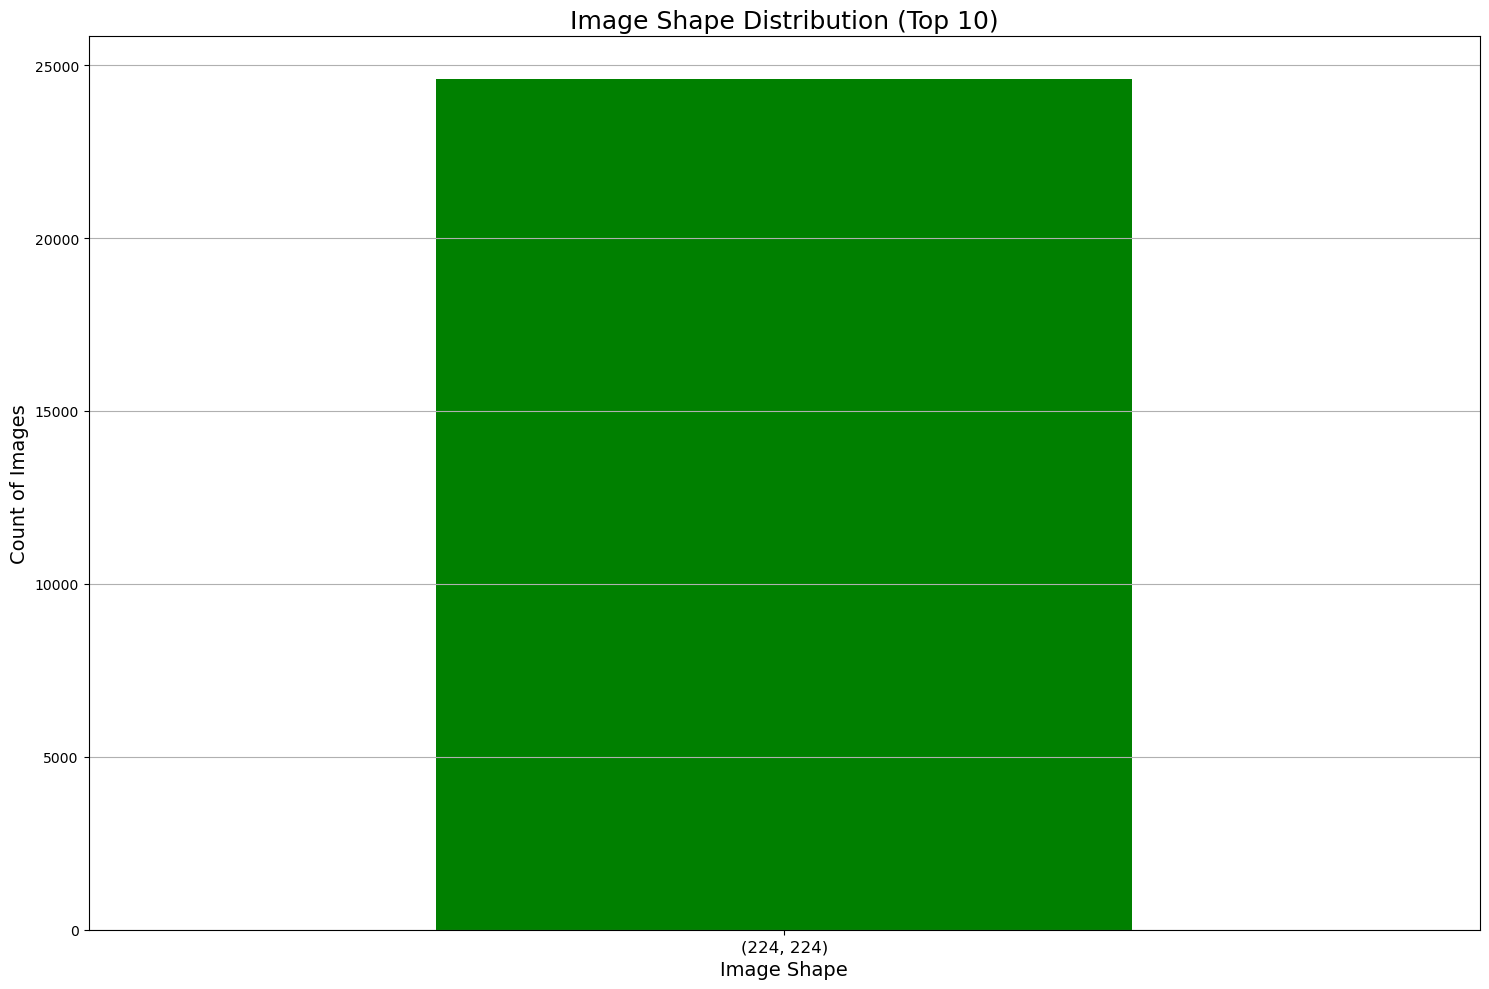

In [11]:
# Group the DataFrame by 'Aspect_Ratio' and count the occurrences
image_shape_counts = df['Image_Shape'].value_counts()

# Plot the bar chart
plt.figure(figsize=(15, 10))
image_shape_counts[:10].plot(kind='bar', color = 'green')
plt.title('Image Shape Distribution (Top 10)', fontsize = 18)
plt.xlabel('Image Shape', fontsize = 14)
plt.ylabel('Count of Images', fontsize = 14)
plt.xticks(rotation=0, fontsize = 12)
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

In [12]:
print('Number of different image sizes: ', len(df['Image_Shape'].value_counts()))
print('Number of different aspect ratios: ', len(df['Aspect_Ratio'].value_counts()))

Number of different image sizes:  1
Number of different aspect ratios:  1
